# Demonstration of the functionality of the tensor_tools module

This is a module with various utilities related to tensors.

In [1]:
# import some general scientific Python libraries
import numpy as np
import matplotlib.pyplot as plt

# import required PyRockWave modules
import christoffel as ch
import coordinates as coor
import tensor_tools as t
from ElasticClass import ElasticProps

In [2]:
# load test data (note that the tensor provided is not symmetric!)
Cij = np.array([[320.2,  71.0,  71.0,   0. ,   0. ,   0. ],
                [  0. , 196.5,  76.0,   0. ,   0. ,   0. ],
                [  0. ,   0., 232.3,   0. ,   0. ,   0. ],
                [  0. ,   0. ,   0. ,  63.2,   0. ,   0. ],
                [  0. ,   0. ,   0. ,   0. ,  76.6,   0. ],
                [  0. ,   0. ,   0. ,   0. ,   0. ,  79.7]])

density = 3.343

## Example 1: Symmetrise tensor

In [3]:
Cij = t._symmetrise_tensor(Cij)

Cij

array([[320.2,  71. ,  71. ,   0. ,   0. ,   0. ],
       [ 71. , 196.5,  76. ,   0. ,   0. ,   0. ],
       [ 71. ,  76. , 232.3,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,  63.2,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,  76.6,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,  79.7]])

## Example 2: Rearrange the Voigt stiffness tensor

This method rearranges the 6x6 (rank 2, dimension 6) stiffness (elastic) matrix in Voigt notation into a 3x3x3x3 (rank 4, dimension 3) stiffness tensor. This rearrangement is necessary to perform tensor operations while retaining the original information.

In [4]:
Cijkl = t._rearrange_tensor(Cij)

Cijkl.shape

(3, 3, 3, 3)

In [5]:
Cijkl

array([[[[320.2,   0. ,   0. ],
         [  0. ,  71. ,   0. ],
         [  0. ,   0. ,  71. ]],

        [[  0. ,  79.7,   0. ],
         [ 79.7,   0. ,   0. ],
         [  0. ,   0. ,   0. ]],

        [[  0. ,   0. ,  76.6],
         [  0. ,   0. ,   0. ],
         [ 76.6,   0. ,   0. ]]],


       [[[  0. ,  79.7,   0. ],
         [ 79.7,   0. ,   0. ],
         [  0. ,   0. ,   0. ]],

        [[ 71. ,   0. ,   0. ],
         [  0. , 196.5,   0. ],
         [  0. ,   0. ,  76. ]],

        [[  0. ,   0. ,   0. ],
         [  0. ,   0. ,  63.2],
         [  0. ,  63.2,   0. ]]],


       [[[  0. ,   0. ,  76.6],
         [  0. ,   0. ,   0. ],
         [ 76.6,   0. ,   0. ]],

        [[  0. ,   0. ,   0. ],
         [  0. ,   0. ,  63.2],
         [  0. ,  63.2,   0. ]],

        [[ 71. ,   0. ,   0. ],
         [  0. ,  76. ,   0. ],
         [  0. ,   0. , 232.3]]]])

There is also a method to convert the elastic tensor in the matrix with Voigt notation.

In [6]:
t._tensor_in_voigt(Cijkl)

array([[320.2,  71. ,  71. ,   0. ,   0. ,   0. ],
       [ 71. , 196.5,  76. ,   0. ,   0. ,   0. ],
       [ 71. ,  76. , 232.3,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,  63.2,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,  76.6,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,  79.7]])

## Example 3: Rotate the stiffness tensor around a specific axis

The following method rotates a stiffness matrix (Voigt notation) or a stiffness tensor about a specified axis. The rotation is performed in the Cartesian coordinate system, taking into account the following reference frame:

TODO


In [7]:
Cij_rot, Cijkl_rot = t.rotate_stiffness_tensor(Cij, angle_degrees=45, rotation_axis="z")
Cij_rot2, Cijkl_rot2 = t.rotate_stiffness_tensor(Cij, angle_degrees=90, rotation_axis="y")

In [8]:
Cij_rot

array([[244.375,  84.975,  73.5  ,   0.   ,   0.   ,  30.925],
       [ 84.975, 244.375,  73.5  ,   0.   ,   0.   ,  30.925],
       [ 73.5  ,  73.5  , 232.3  ,   0.   ,   0.   ,  -2.5  ],
       [  0.   ,   0.   ,   0.   ,  69.9  ,   6.7  ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   6.7  ,  69.9  ,   0.   ],
       [ 30.925,  30.925,  -2.5  ,   0.   ,   0.   ,  93.675]])

In [9]:
Cij_rot2

array([[232.3,  76. ,  71. ,   0. ,   0. ,   0. ],
       [ 76. , 196.5,  71. ,   0. ,   0. ,   0. ],
       [ 71. ,  71. , 320.2,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,  79.7,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,  76.6,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,  63.2]])

Let's create some figures to check the rotation

In [10]:
# FOR PLOTTING
# create equispaced wavevectors in spherical coordinates (in radians)
wavevectors = coor.equispaced_S2_grid2(num_points=5000)

In [11]:
# Calculate phase velocities (TO IMPROVE!)
Mil = ch._christoffel_matrix(wavevectors, Cijkl)
Mil_rot = ch._christoffel_matrix(wavevectors, Cijkl_rot)
Mil_rot2 = ch._christoffel_matrix(wavevectors, Cijkl_rot2)

Mil = Mil /density
Mil_rot = Mil_rot /density
Mil_rot2 = Mil_rot2 /density

eigenvalues, eigenvectors = ch._calc_eigen(Mil)
eigenvalues_rot, eigenvectors_rot = ch._calc_eigen(Mil_rot)
eigenvalues_rot2, eigenvectors_rot2 = ch._calc_eigen(Mil_rot2)

phase_velocities = ch.calc_phase_velocities(eigenvalues)
phase_velocities_rot = ch.calc_phase_velocities(eigenvalues_rot)
phase_velocities_rot2 = ch.calc_phase_velocities(eigenvalues_rot2)

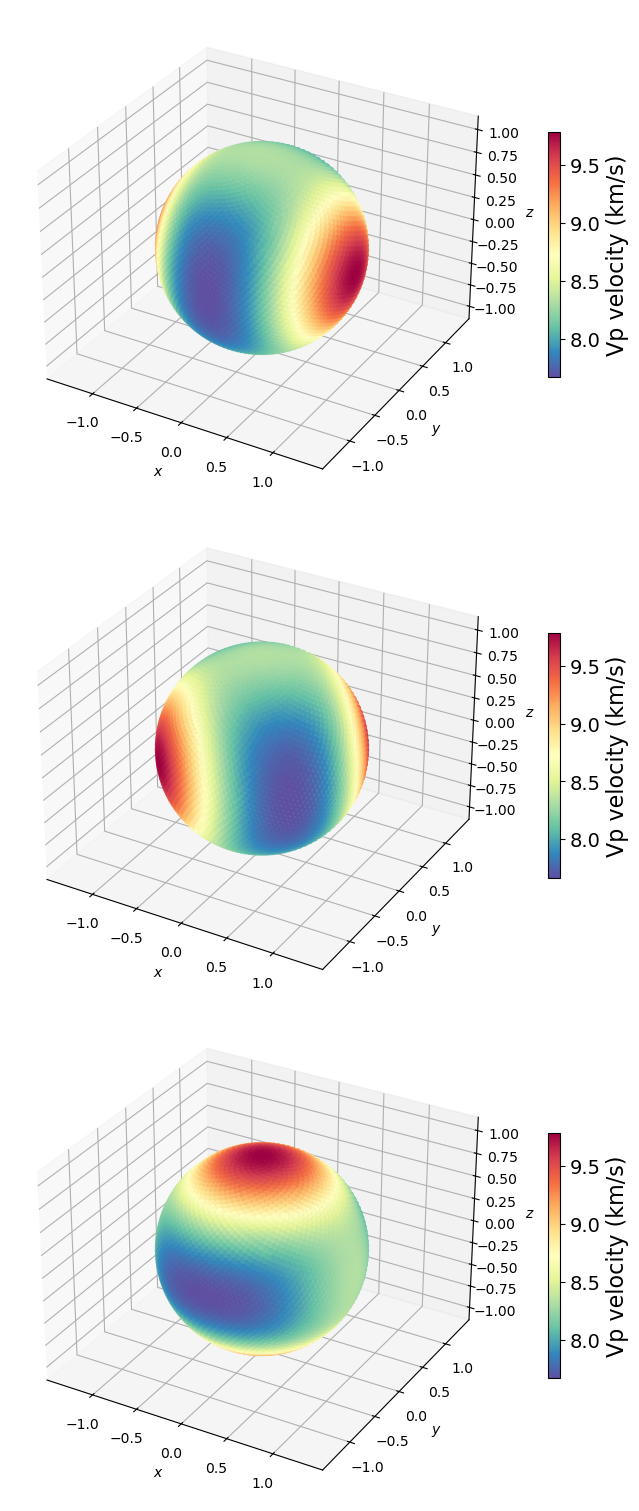

In [12]:
# plot to test
fig, (ax1, ax2, ax3) = plt.subplots(subplot_kw={"projection": "3d"}, nrows=3, figsize=(7, 15), constrained_layout=True)

# axe 1
speed1 = ax1.scatter(wavevectors[:, 0], wavevectors[:, 1], wavevectors[:, 2], c=phase_velocities[:, 2], cmap='Spectral_r')
ax1.axis('equal')
ax1.set_xlabel(r'$x$'), ax1.set_ylabel(r'$y$'), ax1.set_zlabel(r'$z$')

# add color bar
cbar = fig.colorbar(speed1, ax=ax1, shrink=0.5, location='right')
cbar.set_label('Vp velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# axe 2
speed2 = ax2.scatter(wavevectors[:, 0], wavevectors[:, 1], wavevectors[:, 2], c=phase_velocities_rot[:, 2], cmap='Spectral_r')
ax2.axis('equal')
ax2.set_xlabel(r'$x$'), ax2.set_ylabel(r'$y$'), ax2.set_zlabel(r'$z$')

# add color bar
cbar = fig.colorbar(speed1, ax=ax2, shrink=0.5, location='right')
cbar.set_label('Vp velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# axe 3
speed3 = ax3.scatter(wavevectors[:, 0], wavevectors[:, 1], wavevectors[:, 2], c=phase_velocities_rot2[:, 2], cmap='Spectral_r')
ax3.axis('equal')
ax3.set_xlabel(r'$x$'), ax3.set_ylabel(r'$y$'), ax3.set_zlabel(r'$z$')

# add color bar
cbar = fig.colorbar(speed1, ax=ax3, shrink=0.5, location='right')
cbar.set_label('Vp velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)

In [13]:
# check that average values remains the same
# max and min seismic velocities
print(f"Vp. max: {np.max(phase_velocities[:, 2]):.3f}, min: {np.min(phase_velocities[:, 2]):.3f}")
print(f"Vs1. max: {np.max(phase_velocities[:, 1]):.3f}, min: {np.min(phase_velocities[:, 1]):.3f}")
print(f"Vs2. max: {np.max(phase_velocities[:, 0]):.3f}, min: {np.min(phase_velocities[:, 0]):.3f}")
print("")
print("ROTATED TENSOR (45 degrees, z axis)")
print(f"Vp. max: {np.max(phase_velocities_rot[:, 2]):.3f}, min: {np.min(phase_velocities_rot[:, 2]):.3f}")
print(f"Vs1. max: {np.max(phase_velocities_rot[:, 1]):.3f}, min: {np.min(phase_velocities_rot[:, 1]):.3f}")
print(f"Vs2. max: {np.max(phase_velocities_rot[:, 0]):.3f}, min: {np.min(phase_velocities_rot[:, 0]):.3f}")
print("")
print("ROTATED TENSOR (90 degrees, y axis)")
print(f"Vp. max: {np.max(phase_velocities_rot2[:, 2]):.3f}, min: {np.min(phase_velocities_rot2[:, 2]):.3f}")
print(f"Vs1. max: {np.max(phase_velocities_rot2[:, 1]):.3f}, min: {np.min(phase_velocities_rot2[:, 1]):.3f}")
print(f"Vs2. max: {np.max(phase_velocities_rot2[:, 0]):.3f}, min: {np.min(phase_velocities_rot2[:, 0]):.3f}")

Vp. max: 9.787, min: 7.667
Vs1. max: 5.465, min: 4.787
Vs2. max: 4.860, min: 4.348

ROTATED TENSOR (45 degrees, z axis)
Vp. max: 9.787, min: 7.667
Vs1. max: 5.465, min: 4.787
Vs2. max: 4.860, min: 4.348

ROTATED TENSOR (90 degrees, y axis)
Vp. max: 9.785, min: 7.667
Vs1. max: 5.465, min: 4.787
Vs2. max: 4.862, min: 4.348


In [14]:
anis = 200 * (np.max(phase_velocities[:, 2]) - np.min(phase_velocities[:, 2])) / (np.max(phase_velocities[:, 2]) + np.min(phase_velocities[:, 2]))
anis_rot = 200 * (np.max(phase_velocities_rot[:, 2]) - np.min(phase_velocities_rot[:, 2])) / (np.max(phase_velocities_rot[:, 2]) + np.min(phase_velocities_rot[:, 2]))
anis_rot2 = 200 * (np.max(phase_velocities_rot2[:, 2]) - np.min(phase_velocities_rot2[:, 2])) / (np.max(phase_velocities_rot2[:, 2]) + np.min(phase_velocities_rot2[:, 2]))
print(f"Vp anisotropy = {anis:.1f} %")
print(f"Vp anisotropy (rotated) = {anis_rot:.1f} %")
print(f"Vp anisotropy (rotated 2) = {anis_rot2:.1f} %")

Vp anisotropy = 24.3 %
Vp anisotropy (rotated) = 24.3 %
Vp anisotropy (rotated 2) = 24.3 %


In [15]:
avg_props = ElasticProps(
    temperature=2,
    pressure=1e-5,
    density=density,
    Cij=Cij)

avg_props_rot = ElasticProps(
    temperature=2,
    pressure=1e-5,
    density=density,
    Cij=Cij_rot)

avg_props_rot2 = ElasticProps(
    temperature=2,
    pressure=1e-5,
    density=density,
    Cij=Cij_rot2)

In [16]:
avg_props.wavespeeds

,Unit:km/s,Vp,Vs,Vp/vs
0,Voigt,8.426984,4.870442,1.7302
1,Hill,8.353341,4.823210,1.7319
2,Reuss,8.279042,4.775511,1.7336


In [17]:
avg_props_rot.wavespeeds

,Unit:km/s,Vp,Vs,Vp/vs
0,Voigt,8.426984,4.870442,1.7302
1,Hill,8.353341,4.823210,1.7319
2,Reuss,8.279042,4.775511,1.7336


## Example 4: Rotate the stiffness tensor with an arbitrary rotation

For this we will use the ``_rotate_Cijkl()`` method from tensor_tools and the Rotation module from Scipy.

In [18]:
from scipy.spatial.transform import Rotation as r

# define an arbitrary rotation (here I use Euler angles Bunge convention and extrinsic rotation)
rotation = r.from_euler('zxz', [30, 45, 40], degrees=True)


# rotate tensor
rotated_Cijkl = t._rotate_Cijkl(
    stiffness_tensor=Cijkl,
    rotation_matrix=rotation.as_matrix()
)

# display rotated tensor
np.around(t._tensor_in_voigt(rotated_Cijkl), 3)

array([[213.931,  82.512,  77.033,  -1.195,   9.232,  13.064],
       [ 82.512, 269.806,  82.969,  18.295,   9.939,  23.623],
       [ 77.033,  82.969, 216.236,   3.916,  10.639,  -2.66 ],
       [ -1.195,  18.295,   3.916,  85.709,   4.744,  11.78 ],
       [  9.232,   9.939,  10.639,   4.744,  70.943,   5.376],
       [ 13.064,  23.623,  -2.66 ,  11.78 ,   5.376,  87.362]])

In [19]:
# Calculate phase velocities (TO IMPROVE!)
Mil = ch._christoffel_matrix(wavevectors, rotated_Cijkl)
Mil = Mil /density
eigenvalues, eigenvectors = ch._calc_eigen(Mil)
phase_velocities = ch.calc_phase_velocities(eigenvalues)

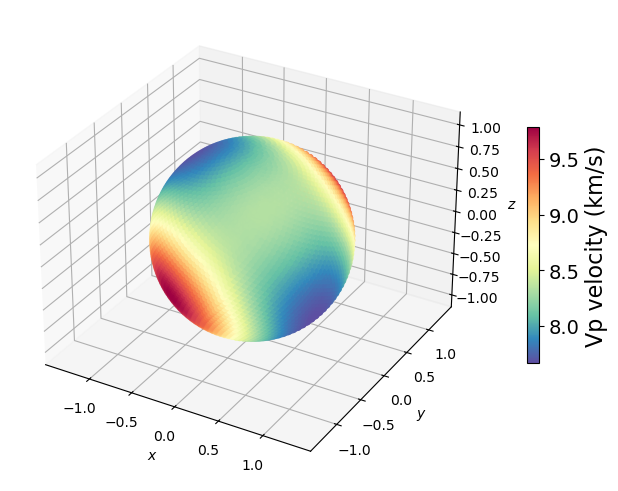

In [20]:
# plot to test
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

speed = ax.scatter(wavevectors[:, 0], wavevectors[:, 1], wavevectors[:, 2], c=phase_velocities[:, 2], cmap='Spectral_r')
ax.axis('equal')
ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

# add color bar
cbar = fig.colorbar(speed, ax=ax, shrink=0.5, location='right')
cbar.set_label('Vp velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)